### WGU D208 Predictive Modeling
# Task 2 - Logistic Regression

#### Ednalyn C. De Dios
#### August 7, 2023

## A1. Research Question

> ### _Excluding survey responses, what factors affect churn?_

## A2. Goals

The organization will benefit from knowing what factors affect churn. This will inform the decisions of stakeholders in matters where customer retention is involved. For example, it takes a lot more money to acquire new customers than to retain existing ones. Knowing which customers are at a high risk of churn will provide the organization with advanced warnings to prevent churn. This will surely reduce operating costs of the organization.

## B1. Summary of Assumptions

According to Statology.org, assumptions of a multiple logistic regression model include the following:

- The response variable is binary
- Independence of observations
- No multicollinearity in the explanatory variables
- Absence of extreme outliers in the dataset
- Linear relationship  between the explanatory variables and the logit of the response variable
- Sample size is large

## B2. Tool Benefits

Jupyter Notebooks and the Python programming language will be used in this analysis. I chose to program in Python because it is very readable. It ranks among the most popular languages worldwide because it's powerful, flexible, and easy to use. (Geeksforgeeks.org, 2023)  Moreover, the Python community is active (Geeksforgeeks.org, 2023) and the language sports a vast system of mature packages for data science and machine learning. 

## B3. Appropriate Technique

The target variable, Churn, is a categorical variable with only two binary outcomes and multiple independent variables. Hence, multiple logistic regression is the right tool to analyze if we can predict whether a customer will churn or not. In addition, the data set has several good candidates of explanatory variables that will inform our predictions. We will determine if the independent variables have a positive or negative relationship to the target variable. This can perhaps affect the organization's decisions on customer retention.

## C1. Data Cleaning

Our goal for cleaning the data set is to have a dataframe free of duplicates, missing values, outliers, and irrelevant variables. To do so, we will execute the following goals and steps:

- Find and remove duplicates.
  > We will use the duplicated() method.
- Handle missing values.
  > We will use a custom function that uses isnull() method.
- Remove outliers where necessary.
  > We will calculate the iqr and remove extreme outliers if necessary.
- Drop irrelevant features.
  > We will use the drop() method to exclude features that are not relevant to the analysis.
  > Survey responses will also be dropped since we're not considering them in the research question.

In [1]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

# to print out all the outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# read the csv file
df = pd.read_csv('churn_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### _Find and remove duplicates_

In [3]:
# select rows that are duplicated based on all columns. Any records after the first is considered a duplicate and can be dropped
dup = df[df.duplicated()]

# find out how many rows are duplicated
dup.shape

(0, 50)

#### _Handle missing values_

In [4]:
def show_missing(df):
    """
    Takes a dataframe and returns a dataframe with stats
    on missing and null values with their percentages.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / df.shape[0]) * 100
    empty_count = pd.Series(((df == ' ') | (df == '')).sum())
    empty_percentage = (empty_count / df.shape[0]) * 100
    nan_count = pd.Series(((df == 'nan') | (df == 'NaN')).sum())
    nan_percentage = (nan_count / df.shape[0]) * 100
    dfx = pd.DataFrame({'num_missing': null_count, 'missing_percentage': null_percentage,
                         'num_empty': empty_count, 'empty_percentage': empty_percentage,
                         'nan_count': nan_count, 'nan_percentage': nan_percentage})
    return dfx

show_missing(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.00,0,0.0,0,0.0
Customer_id,0,0.00,0,0.0,0,0.0
Interaction,0,0.00,0,0.0,0,0.0
UID,0,0.00,0,0.0,0,0.0
City,0,0.00,0,0.0,0,0.0
State,0,0.00,0,0.0,0,0.0
County,0,0.00,0,0.0,0,0.0
Zip,0,0.00,0,0.0,0,0.0
Lat,0,0.00,0,0.0,0,0.0
Lng,0,0.00,0,0.0,0,0.0


In [5]:
# count of values in the column
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [6]:
# fill missing values with None as in no service
df = df.fillna("None")

df['InternetService'].value_counts()
show_missing(df)

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
CaseOrder,0,0.0,0,0.0,0,0.0
Customer_id,0,0.0,0,0.0,0,0.0
Interaction,0,0.0,0,0.0,0,0.0
UID,0,0.0,0,0.0,0,0.0
City,0,0.0,0,0.0,0,0.0
State,0,0.0,0,0.0,0,0.0
County,0,0.0,0,0.0,0,0.0
Zip,0,0.0,0,0.0,0,0.0
Lat,0,0.0,0,0.0,0,0.0
Lng,0,0.0,0,0.0,0,0.0


#### Remove outliers where necessary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

#### _Remove outliers_

{'whiskers': [<matplotlib.lines.Line2D at 0x27883acbbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x27883ae9130>,
 'boxes': [<matplotlib.lines.Line2D at 0x27883acb910>],
 'medians': [<matplotlib.lines.Line2D at 0x27883ae9670>],
 'fliers': [<matplotlib.lines.Line2D at 0x27883ae9910>],
 'means': []}

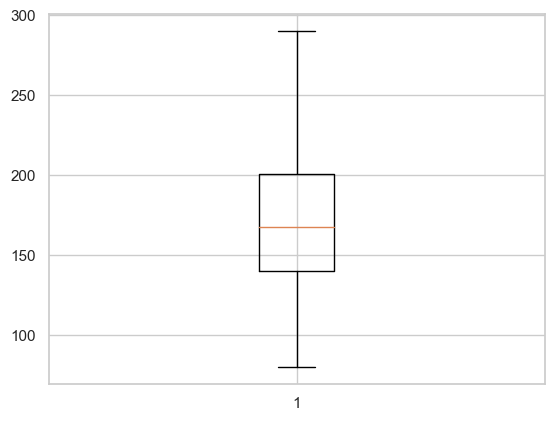

<Figure size 1000x700 with 0 Axes>

In [8]:
# visualize the distribution of column values
plt.boxplot(df['MonthlyCharge'])
fig = plt.figure(figsize =(10, 7))

#### _Drop irrelevant features_

In [9]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [10]:
# drop columns
df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
        'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
        inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

In [12]:
df.rename(columns={'Item1':'Responsive',
          'Item2':'Fixes',
          'Item3':'Replacements',
          'Item4':'Reliability',
          'Item5':'Options',
          'Item6':'Respectful',
          'Item7':'Courteous',
          'Item8':'ActiveListening'}, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Children              10000 non-null  int64  
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Marital               10000 non-null  object 
 4   Gender                10000 non-null  object 
 5   Churn                 10000 non-null  object 
 6   Outage_sec_perweek    10000 non-null  float64
 7   Email                 10000 non-null  int64  
 8   Contacts              10000 non-null  int64  
 9   Yearly_equip_failure  10000 non-null  int64  
 10  Techie                10000 non-null  object 
 11  Contract              10000 non-null  object 
 12  Port_modem            10000 non-null  object 
 13  Tablet                10000 non-null  object 
 14  InternetService       10000 non-null  object 
 15  Phone               

## C2. Summary Statistics

As shown in the output of the info() method on cell 2, the original dataframe consisted of 10,000 records and 50 features. Further investigation revealed that the provided dataframe is mostly cleaned already. The only discrepancy I noticed was the existence of missing values on InternetService. That has since been mitigated in cell 6. However, I also decided to rename the last 8 columns of survey responses to make them more descriptive of their values.

Also of note is removing irrelevant features in cell 9. Most of these columns hold no bearing on the target variable and were dropped accordingly. Items one to eight are survey results and we're not taking them into account in the research question because we want to somehow create an advanced warning system for churn that does not involve asking customers for their feedback. This process brings down our dataframe to 28 columns, of which 10 of them are numerical.

The output of describe() method revealed the average customer to be 53 years old and has two children (with a standard deviation of 2). They have experienced an average of 10 seconds per week and suffered a maximum of 6 equipment failure in a year. They have received twelve emails and one contact. On average, the customer has been with the company for 34 years and consumes about 3,392 GB of bandwidth per year. The average monthly charge is $173.

In [14]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


## C3. Visualizations

In [15]:
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

array([[<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>],
       [<Axes: title={'center': 'Email'}>,
        <Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>]], dtype=object)

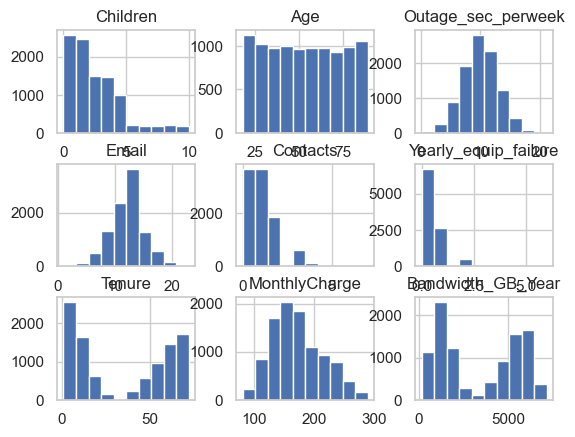

In [16]:
# make historgrams and save the plot
df[['Children',
    'Age',
    'Outage_sec_perweek',
    'Email',
    'Contacts',
    'Yearly_equip_failure',
    'Tenure',
    'MonthlyCharge',
    'Bandwidth_GB_Year'
   ]].hist()
plt.savefig('churn_univariate_hist2.jpg')

Observations:
- Most customers have 5 children or less.
- Outages and Email is distributed normally.
- Tenure and Bandwidth are polarized (U-shaped) .
- MonthlyCharge is skewed to the right. 

In [17]:
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

[Text(0, 0, 'Fiber Optic'), Text(1, 0, 'DSL'), Text(2, 0, 'None')]

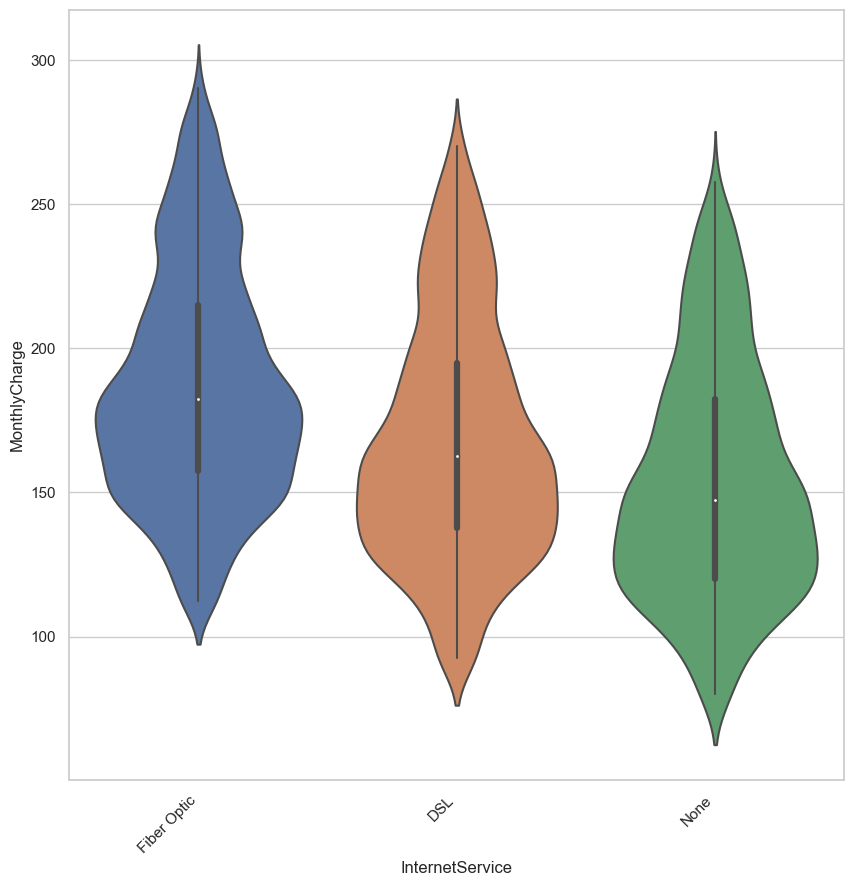

In [18]:
# make violin plot and save
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="InternetService", y="MonthlyCharge", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('churn_bivariate_internetservice2.jpg')

<Figure size 1000x1000 with 0 Axes>

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

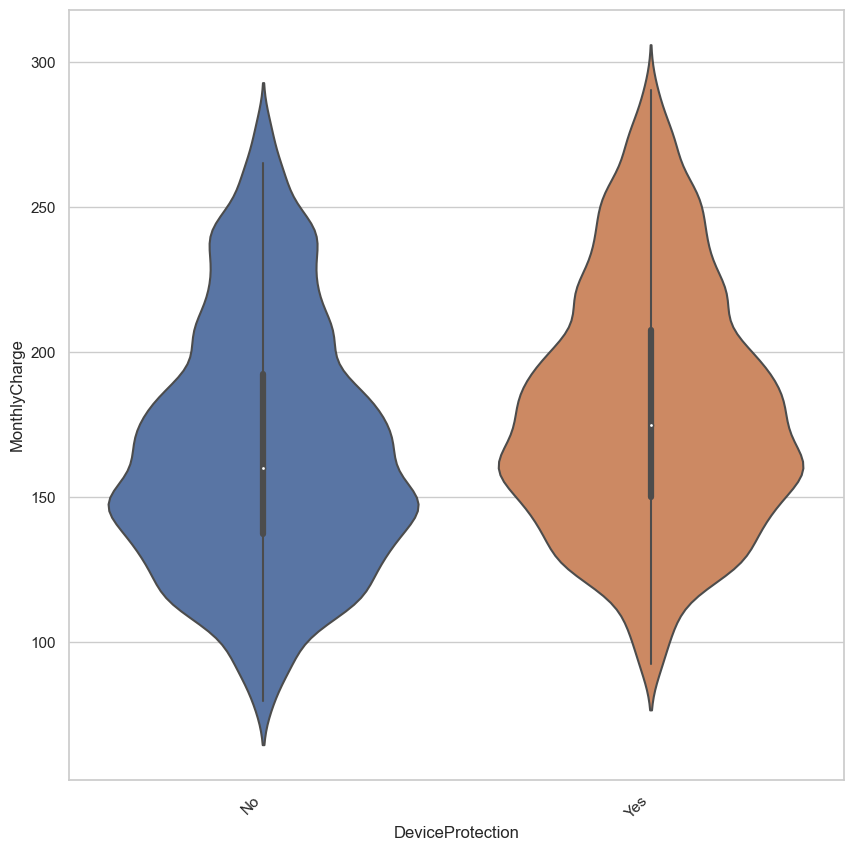

In [19]:
# make violin plot and save
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="DeviceProtection", y="MonthlyCharge", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('churn_bivariate_deviceprotection2.jpg')

## C4. Data Transformation

The goal is to have a dataframe that is ready for machine learning. This means we have to transform the categorical into numerical ones by generating dummy variables. I also plan on handling the imbalance on Churn by using SMOTE (Synthetic Minority Oversampling Technique).

In [20]:
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [21]:
# assemble list of categorical columns to generate dummy variables for
dummy_columns = ['Marital',
                 'Gender',
                 'Techie',
                 'Contract',
                 'Port_modem',
                 'Tablet',
                 'InternetService',
                 'Phone',
                 'Multiple',
                 'OnlineSecurity',
                 'OnlineBackup',
                 'DeviceProtection',
                 'TechSupport',
                 'StreamingTV',
                 'StreamingMovies',
                 'PaperlessBilling',
                 'PaymentMethod'
                ]

In [22]:
def dummify(df, column):
    """
    Takes a dataframe and column to return a dataframe with 
    dummy variables appended.
    """
    dummy = pd.get_dummies(df[column], prefix=column, prefix_sep='_',)
    return pd.concat([df, dummy], axis=1)

In [23]:
dummified = df.copy()

# loop through all the columns tp generate dummy for
for col in dummy_columns:
    dummified = dummify(dummified, col)

In [24]:
dummified.head()

,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,False
1,1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False
2,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
3,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True
4,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True


In [25]:
# drop original columns we generated dummies for
dummified.drop(columns=dummy_columns, inplace=True)
dummified.head()

,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0,68,28561.99,No,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,False
1,1,27,21704.77,Yes,11.699080,12,0,1,1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False
2,4,50,9609.57,No,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
3,1,48,18925.23,No,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True
4,0,83,40074.19,Yes,8.147417,16,2,1,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True


In [26]:
dummified.columns

Index(['Children', 'Age', 'Income', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Marital_Divorced', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
      

In [27]:
# move target variable at the end of the dataframe
df = dummified[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Marital_Divorced', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Churn']]

In [28]:
df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,False,False,No
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False,False,False,Yes
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,False,False,False,True,True,False,False,False,True,False,False,True,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,No
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,False,True,No
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,False,False,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,True,True,False,True,False,False,False,False,True,Yes


In [29]:
# replace True with 1's and False with 0's
df = df.replace(True, 1)
df = df.replace(False, 0)

# replace 'Yes' with 1's and 'No' with 0's
df['Churn'] = df['Churn'].replace('Yes', 1)
df['Churn'] = df['Churn'].replace('No', 0)

df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


In [30]:
df.to_csv('churn_prepared2.csv', index=False)

## C5. Prepared Data Set

Filename: churn_prepared2.csv

## D1. Initial Model

In [31]:
scaler = MinMaxScaler()

# apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']
df[num_vars] = scaler.fit_transform(df[num_vars])

df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Churn
0,0.0,0.704225,28561.99,0.373260,0.409091,0.000000,0.166667,0.081624,0.439985,0.106951,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
1,0.1,0.126761,21704.77,0.549537,0.500000,0.000000,0.166667,0.002203,0.773872,0.092165,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1
2,0.4,0.450704,9609.57,0.504705,0.363636,0.000000,0.166667,0.207804,0.380474,0.271180,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
3,0.1,0.422535,18925.23,0.701827,0.636364,0.285714,0.000000,0.226580,0.190207,0.286868,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0.0,0.915493,40074.19,0.381271,0.681818,0.285714,0.166667,0.009447,0.332900,0.016561,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1


In [32]:
# split the dataframe between independent and dependent variables
X = df.drop('Churn',axis= 1)
y = df[['Churn']]

X.head()
y.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Techie_No,Techie_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
0,0.0,0.704225,28561.99,0.373260,0.409091,0.000000,0.166667,0.081624,0.439985,0.106951,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0.1,0.126761,21704.77,0.549537,0.500000,0.000000,0.166667,0.002203,0.773872,0.092165,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0
2,0.4,0.450704,9609.57,0.504705,0.363636,0.000000,0.166667,0.207804,0.380474,0.271180,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
3,0.1,0.422535,18925.23,0.701827,0.636364,0.285714,0.000000,0.226580,0.190207,0.286868,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1
4,0.0,0.915493,40074.19,0.381271,0.681818,0.285714,0.166667,0.009447,0.332900,0.016561,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1


,Churn
0,0
1,1
2,0
3,0
4,1


In [33]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=493)

In [34]:
sm = SMOTE(random_state=493)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [35]:
logreg = LogisticRegression()
logreg.fit(X_res, y_res.values.ravel())

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cfm = confusion_matrix(y_test, y_pred)

print(cfm)
print(classification_report(y_test, y_pred))

LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.73
[[1996  220]
 [ 588  196]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2216
           1       0.47      0.25      0.33       784

    accuracy                           0.73      3000
   macro avg       0.62      0.58      0.58      3000
weighted avg       0.69      0.73      0.70      3000



<Axes: ylabel='Feature'>

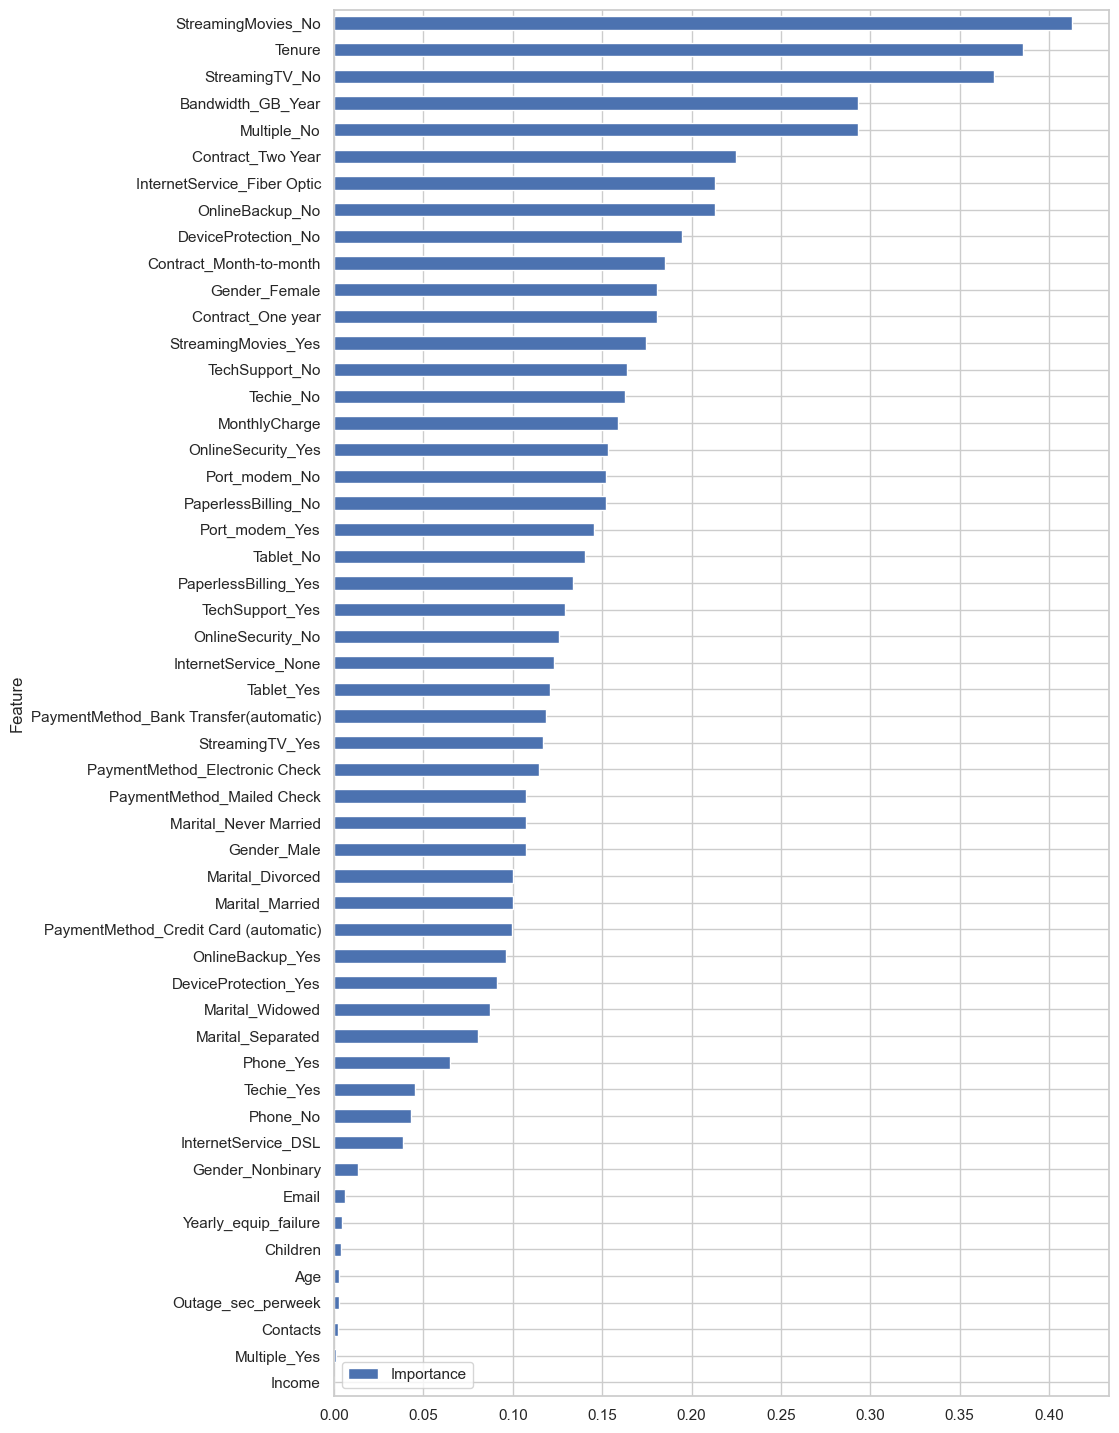

In [36]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 18))

## D2. Justification of Model Reduction

To arrive at a reduced multiple logistic regression model, feature importance were extracted from the initial model and plotted in order of importance. The top 5 features that are the most important are kept and those below were dropped. In this, StreamingMovies, Tenure, StreamingTV, Bandwidth, and Multiple were selected. These features together explain the classifier model that predicts churn.

## D3. Reduced Linear Regression Model

In [37]:
rfe_columns = ['StreamingMovies_No', 'Tenure', 'StreamingTV_No', 'Bandwidth_GB_Year', 'Multiple_No']

In [38]:
# create dataframe with RFE-selected variables
X_res_rfe = X_res[rfe_columns]

# create dataframe with RFE-selected variables
X_test_rfe = X_test[rfe_columns]

In [39]:
logreg2 = LogisticRegression()
result = logreg2.fit(X_res_rfe, y_res.values.ravel())

y_pred2 = logreg2.predict(X_test_rfe)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_rfe, y_test)))

cfm2 = confusion_matrix(y_test, y_pred2)

print(cfm2)
print(classification_report(y_test, y_pred2))

Accuracy of logistic regression classifier on test set: 0.84
[[1944  272]
 [ 194  590]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2216
           1       0.68      0.75      0.72       784

    accuracy                           0.84      3000
   macro avg       0.80      0.81      0.80      3000
weighted avg       0.85      0.84      0.85      3000



<Axes: ylabel='Feature'>

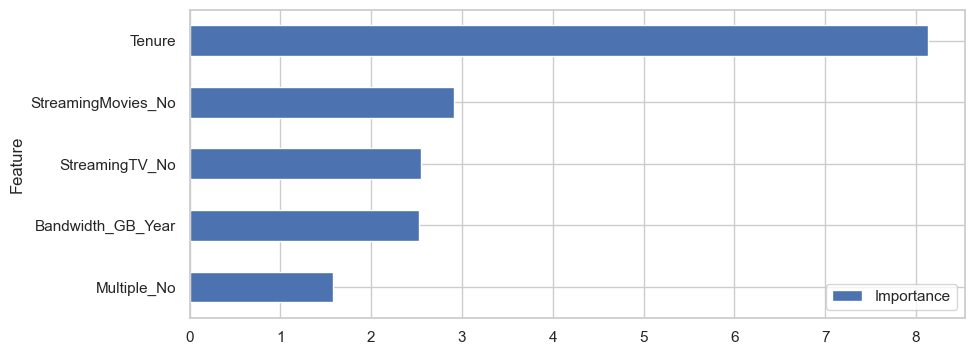

In [40]:
coefficients2 = logreg2.coef_[0]

feature_importance2 = pd.DataFrame({'Feature': X_test_rfe.columns, 'Importance': np.abs(coefficients2)})
feature_importance2 = feature_importance2.sort_values('Importance', ascending=True)
feature_importance2.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 4))

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

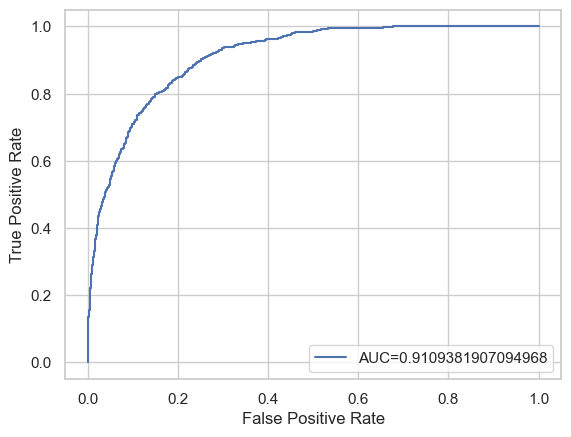

In [41]:
#define metrics
y_pred_proba = logreg2.predict_proba(X_test_rfe)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## E1. Model Comparison

The initial classifier model using ALL of the variables performed at 73% accuracy. When only the top 5 feastures were used to train the model, performance increased to 84% accuracy. Moreover, the AUC score is 91%.

## E2. Output and Calculations

All output and calculations of the analysis performed are included in the previous cells. The confusion matrices and accuracy scores can be found at cells 35 and 39. The AUC score can be found at cell 41.

## E3. Code

Filename: task1.py

```
import sys

# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# for modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

def dummify(df, column):
    """
    Takes a dataframe and column to return a dataframe with 
    dummy variables appended.
    """
    dummy = pd.get_dummies(df[column], prefix=column, prefix_sep='_',)
    return pd.concat([df, dummy], axis=1)

def main():
    """Main entry point for the script."""

    # read the csv file
    df = pd.read_csv('churn_clean.csv')

    # fill missing values with None as in no service
    df = df.fillna("None")

    # drop columns
    df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
        'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
            'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
            inplace=True)

    # assemble list of categorical columns to generate dummy variables for
    dummy_columns = ['Marital',
                    'Gender',
                    'Techie',
                    'Contract',
                    'Port_modem',
                    'Tablet',
                    'InternetService',
                    'Phone',
                    'Multiple',
                    'OnlineSecurity',
                    'OnlineBackup',
                    'DeviceProtection',
                    'TechSupport',
                    'StreamingTV',
                    'StreamingMovies',
                    'PaperlessBilling',
                    'PaymentMethod'
                    ]

    dummified = df.copy()

    # loop through all the columns tp generate dummy for
    for col in dummy_columns:
        dummified = dummify(dummified, col)

    # drop original columns we generated dummies for
    dummified.drop(columns=dummy_columns, inplace=True)

    # move target variable at the end of the dataframe
    df = dummified[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email',
        'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
        'Bandwidth_GB_Year', 'Marital_Divorced', 'Marital_Married',
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
        'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No',
        'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
        'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
        'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
        'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
        'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
        'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
        'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
        'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
        'PaymentMethod_Bank Transfer(automatic)',
        'PaymentMethod_Credit Card (automatic)',
        'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Churn']]

    # replace True with 1's and False with 0's
    df = df.replace(True, 1)
    df = df.replace(False, 0)

    # replace 'Yes' with 1's and 'No' with 0's
    df['Churn'] = df['Churn'].replace('Yes', 1)
    df['Churn'] = df['Churn'].replace('No', 0)

    scaler = MinMaxScaler()

    # apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
    num_vars = ['Children', 'Age', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year', 'MonthlyCharge']
    df[num_vars] = scaler.fit_transform(df[num_vars])

    # split the dataframe between independent and dependent variables
    X = df.drop('Churn',axis= 1)
    y = df[['Churn']]

    # split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=493)

    sm = SMOTE(random_state=493)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    logreg = LogisticRegression()
    logreg.fit(X_res, y_res.values.ravel())

    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

    cfm = confusion_matrix(y_test, y_pred)

    print(cfm)
    print(classification_report(y_test, y_pred))

    rfe_columns = ['StreamingMovies_No', 'Tenure', 'StreamingTV_No', 'Bandwidth_GB_Year', 'Multiple_No']

    # create dataframe with RFE-selected variables
    X_res_rfe = X_res[rfe_columns]

    # create dataframe with RFE-selected variables
    X_test_rfe = X_test[rfe_columns]

    logreg2 = LogisticRegression()
    logreg2.fit(X_res_rfe, y_res.values.ravel())

    y_pred2 = logreg2.predict(X_test_rfe)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test_rfe, y_test)))

    cfm2 = confusion_matrix(y_test, y_pred2)

    print(cfm2)
    print(classification_report(y_test, y_pred2))

    #define metrics
    y_pred_proba = logreg2.predict_proba(X_test_rfe)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    print("AUC Score: " + str(auc))

if __name__ == '__main__':
    sys.exit(main())in())t, y_pred = y_pred)

print("R2 score: " + str(r2_score(y_true = y_test, y_pred = y_pred)))

if __name__ == '__main__':
    sys.exit(main())

## F1. Results

Final regression equation: y = 4.46 - 2.92 * StreamingMovies_No - 8.13 * Tenure - 2.55 * StreamingTV_No + 2.53 * Bandwidth_GB_Year - 1.58 * Multiple_No

The coefficients suggest that for every unit of StreamingMovies_No, Churn will decrease by 2.92 and so on and so forth. The p-values (0's) indicate that the features are statistically significant.

The limitation of this data analysis is the fact that we consciously excluded the survey results. Doing so, would significantly alter the classifier. However, since our research question presupposes that building an advanced warning for Churn does not require those survey results.

In [42]:
print("Coefficients: " + str(logreg2.coef_))
print("Intercept: " + str(logreg2.intercept_))

from sklearn.feature_selection import f_regression

freg=f_regression(X_res_rfe,y_res.values.ravel())
p=freg[1]
print("P-values: " + str(p.round(4)))

print("Features: " + str(X_test_rfe.columns))

Coefficients: [[-2.91577069 -8.12698412 -2.54502909  2.52675018 -1.57974518]]
Intercept: [4.46169283]
P-values: [0. 0. 0. 0. 0.]
Features: Index(['StreamingMovies_No', 'Tenure', 'StreamingTV_No', 'Bandwidth_GB_Year',
       'Multiple_No'],
      dtype='object')


## F2. Recommendations

Given that the reduced logistic regression model's performance is at 84% accuracy, I would recommend that the organization conduct an investigation to figure out whether the problem of churn is either people, product, or process, as they relate to the top 5 features.

## G. Panopto Demonstration

URL: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=affecc58-af15-4e02-a441-b05800325591

## H. Sources of Third-Party Code

- https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
- https://www.statology.org/plot-roc-curve-python/
- https://github.com/ecdedios/code-snippets/blob/main/notebooks/master.ipynb
- https://stackoverflow.com/questions/22306341/python-sklearn-how-to-calculate-p-values

## I. Sources

- https://www.statology.org/assumptions-of-logistic-regression/
- https://www.geeksforgeeks.org/python-language-advantages-applications/

In [43]:
print('Successful run!')

Successful run!
